In [11]:
# All code in this file was created by Ayushi Mehrotra.import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import pandas as pd

## Thresholding Sparisty

In [13]:
# sparsity values for different thresholds
threshold_sparsity = {
                  0.20: 0.9460495107,
                  0.25: 0.9470904225,
                  # 0.30: 0,
                  # 0.35: 0,
                  # 0.40: 0,
                  0.45: 0.9560214518,
                  0.50: 0.9590040691,
                  0.55: 0.9614660792,
                  # 0.60: 0,
                  0.65: 0.9629613099,
                  # 0.70: 0,
                  0.75: 0.9649039431,
                  0.80: 0.9682356517,
                  # 0.85: 0,
                  # 0.90: 0,
                  # 0.95: 0,
                 }

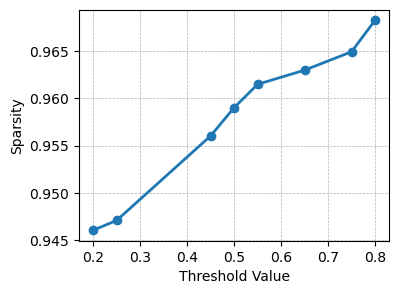

In [14]:
# Plot setup
fig, ax = plt.subplots(figsize=(4, 3))

ax.plot(list(threshold_sparsity.keys()),list(threshold_sparsity.values()), linestyle='-', marker='o', linewidth=2)

# Customize the plot
ax.set_xlabel('Threshold Value', fontsize=10)
ax.set_ylabel('Sparsity', fontsize=10)

# Grid and ticks
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.tick_params(axis='both', which='major', labelsize=10)

plt.show()

## Thresholding ROAD

In [16]:
def get_every_3th_pair(my_dict):
  result = {}
  count = 0
  for key, value in my_dict.items():
    count += 1
    if count % 3 == 0:
      result[key] = value
  return result

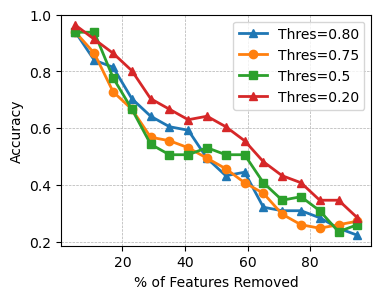

In [129]:
# Get Threshold ROAD metrics
thres05 = {1: 0.9876543209876543, 3: 0.9629629629629629, 5: 0.9382716049382716, 7: 0.9382716049382716, 9: 0.9135802469135802, 11: 0.9382716049382716, 13: 0.9259259259259259, 15: 0.8765432098765432, 17: 0.7777777777777778, 19: 0.7654320987654321, 21: 0.7530864197530864, 23: 0.6666666666666666, 25: 0.6172839506172839, 27: 0.5679012345679012, 29: 0.5432098765432098, 31: 0.5185185185185185, 33: 0.5061728395061729, 35: 0.5061728395061729, 37: 0.5061728395061729, 39: 0.49382716049382713, 41: 0.5061728395061729, 43: 0.5185185185185185, 45: 0.5185185185185185, 47: 0.5308641975308642, 49: 0.5185185185185185, 51: 0.49382716049382713, 53: 0.5061728395061729, 55: 0.5185185185185185, 57: 0.49382716049382713, 59: 0.5061728395061729, 61: 0.4444444444444444, 63: 0.4074074074074074, 65: 0.4074074074074074, 67: 0.37037037037037035, 69: 0.3333333333333333, 71: 0.345679012345679, 73: 0.345679012345679, 75: 0.35802469135802467, 77: 0.35802469135802467, 79: 0.32098765432098764, 81: 0.345679012345679, 83: 0.30864197530864196, 85: 0.32098765432098764, 87: 0.32098765432098764, 89: 0.2345679012345679, 91: 0.24691358024691357, 93: 0.2839506172839506, 95: 0.25925925925925924, 97: 0.2345679012345679, 99: 0.2839506172839506}
thres75 = {1: 0.9629629629629629, 3: 0.9506172839506173, 5: 0.9382716049382716, 7: 0.8765432098765432, 9: 0.8641975308641975, 11: 0.8641975308641975, 13: 0.7901234567901234, 15: 0.7530864197530864, 17: 0.7283950617283951, 19: 0.7283950617283951, 21: 0.7037037037037037, 23: 0.6666666666666666, 25: 0.6419753086419753, 27: 0.5802469135802469, 29: 0.5679012345679012, 31: 0.5185185185185185, 33: 0.5308641975308642, 35: 0.5555555555555556, 37: 0.5185185185185185, 39: 0.5308641975308642, 41: 0.5308641975308642, 43: 0.5308641975308642, 45: 0.5308641975308642, 47: 0.49382716049382713, 49: 0.4691358024691358, 51: 0.48148148148148145, 53: 0.4567901234567901, 55: 0.4691358024691358, 57: 0.41975308641975306, 59: 0.4074074074074074, 61: 0.37037037037037035, 63: 0.37037037037037035, 65: 0.37037037037037035, 67: 0.37037037037037035, 69: 0.32098765432098764, 71: 0.2962962962962963, 73: 0.32098765432098764, 75: 0.2839506172839506, 77: 0.25925925925925924, 79: 0.2345679012345679, 81: 0.24691358024691357, 83: 0.24691358024691357, 85: 0.19753086419753085, 87: 0.20987654320987653, 89: 0.25925925925925924, 91: 0.25925925925925924, 93: 0.20987654320987653, 95: 0.2716049382716049, 97: 0.19753086419753085, 99: 0.12345679012345678}
thres2 = {1: 1.0, 3: 0.9876543209876543, 5: 0.9629629629629629, 7: 0.9259259259259259, 9: 0.9259259259259259, 11: 0.9135802469135802, 13: 0.9135802469135802, 15: 0.9135802469135802, 17: 0.8641975308641975, 19: 0.8395061728395061, 21: 0.8271604938271605, 23: 0.8024691358024691, 25: 0.7530864197530864, 27: 0.7407407407407407, 29: 0.7037037037037037, 31: 0.691358024691358, 33: 0.691358024691358, 35: 0.6666666666666666, 37: 0.654320987654321, 39: 0.6296296296296297, 41: 0.6296296296296297, 43: 0.6172839506172839, 45: 0.6296296296296297, 47: 0.6419753086419753, 49: 0.6419753086419753, 51: 0.6049382716049383, 53: 0.6049382716049383, 55: 0.5802469135802469, 57: 0.6049382716049383, 59: 0.5555555555555556, 61: 0.5308641975308642, 63: 0.5185185185185185, 65: 0.48148148148148145, 67: 0.48148148148148145, 69: 0.4444444444444444, 71: 0.43209876543209874, 73: 0.37037037037037035, 75: 0.38271604938271603, 77: 0.4074074074074074, 79: 0.38271604938271603, 81: 0.38271604938271603, 83: 0.345679012345679, 85: 0.2962962962962963, 87: 0.2716049382716049, 89: 0.345679012345679, 91: 0.2962962962962963, 93: 0.2839506172839506, 95: 0.2839506172839506, 97: 0.2839506172839506, 99: 0.18518518518518517}

# Filter ROAD for graphing
thres05 = get_every_5th_pair(thres05)
thres75 = get_every_5th_pair(thres75)
thres2 = get_every_5th_pair(thres2)
thres8 = get_every_5th_pair(thres8)

# Plot setup
fig, ax = plt.subplots(figsize=(4, 3))

ax.plot(list(thres8.keys()), list(thres8.values()), label='Thres=0.80', linestyle='-', marker='^', linewidth=2)
ax.plot(list(thres75.keys()), list(thres75.values()), label='Thres=0.75', linestyle='-', marker='o', linewidth=2)
ax.plot(list(thres05.keys()), list(thres05.values()), label='Thres=0.5', linestyle='-', marker='s', linewidth=2)
ax.plot(list(thres2.keys()), list(thres2.values()), label='Thres=0.20', linestyle='-', marker='^', linewidth=2)

# Customize the plot
ax.set_xlabel('% of Features Removed', fontsize=10)
ax.set_ylabel('Accuracy', fontsize=10)
ax.legend(fontsize=10)

# Grid and ticks
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.tick_params(axis='both', which='major', labelsize=10)

plt.show()

## Maximum Features ROAD

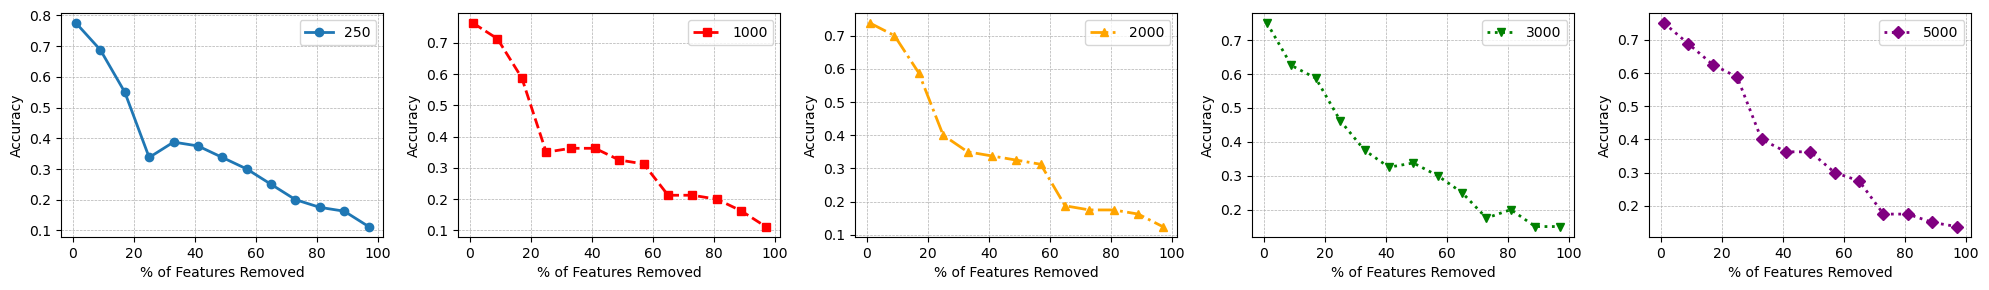

In [18]:
# Load ROAD for Maximum Features
ROAD = np.load('ROAD_250.npy', allow_pickle=True)

a = []
for key in ROAD[0].keys():
    a.append(key)
total = 0
b = [0 for i in range(len(ROAD[0]))]
for i in range(len(ROAD)):
    count = 0
    for value in ROAD[i].values():
        b[count] += value
        count+=1
    total += 1
b = [i/total for i in b]

ig = {a[i]: b[i] for i in range(0, len(a), 4)}

ROAD = np.load('ROAD_1000.npy', allow_pickle=True)

a = []
for key in ROAD[0].keys():
    a.append(key)

b = [0 for i in range(len(ROAD[0]))]
for i in range(len(ROAD)):
    count = 0
    for value in ROAD[i].values():
        b[count] += value
        count+=1
b = [i/len(ROAD) for i in b]

arch = {a[i]: b[i] for i in range(0, len(a), 4)}

ROAD = np.load('ROAD_2000.npy', allow_pickle=True)

a = []
for key in ROAD[0].keys():
    a.append(key)

b = [0 for i in range(len(ROAD[0]))]
for i in range(len(ROAD)):
    count = 0
    for value in ROAD[i].values():
        b[count] += value
        count+=1
b = [i/len(ROAD) for i in b]

cafo = {a[i]: b[i] for i in range(0, len(a), 4)}

ROAD = np.load('ROAD_3000.npy', allow_pickle=True)

a = []
for key in ROAD[0].keys():
    a.append(key)

b = [0 for i in range(len(ROAD[0]))]
for i in range(len(ROAD)):
    count = 0
    for value in ROAD[i].values():
        b[count] += value
        count+=1
b = [i/len(ROAD) for i in b]

caso = {a[i]: b[i] for i in range(0, len(a), 4)}

ROAD = np.load('ROAD_5000.npy', allow_pickle=True)

a = []
for key in ROAD[0].keys():
    a.append(key)

b = [0 for i in range(len(ROAD[0]))]
for i in range(len(ROAD)):
    count = 0
    for value in ROAD[i].values():
        b[count] += value
        count+=1
b = [i/len(ROAD) for i in b]

ours = {a[i]: b[i] for i in range(0, len(a), 4)}

# Plot Setup
fig, axs = plt.subplots(1, 5, figsize=(4*5, 3))

axs[0].plot(list(ig.keys()), list(ig.values()), label='250', linestyle='-', marker='o', linewidth=2)

axs[1].plot(list(ig.keys()), list(arch.values()), label='1000', linestyle='--', marker='s', linewidth=2, color='red')

axs[2].plot(list(ig.keys()), list(cafo.values()), label='2000', linestyle='-.', marker='^', linewidth=2, color='orange')

axs[3].plot(list(ig.keys()), list(caso.values()), label='3000', linestyle=':', marker='v', linewidth=2, color='green')

axs[4].plot(list(ig.keys()), list(ours.values()), label='5000', linestyle=':', marker='D', linewidth=2, color='purple')

for i in range(5):
    # Customize the plot
    axs[i].set_xlabel('% of Features Removed', fontsize=10)
    axs[i].set_ylabel('Accuracy', fontsize=10)
    axs[i].legend(fontsize=10)
    
    # Grid and ticks
    axs[i].grid(True, which='both', linestyle='--', linewidth=0.5)
    axs[i].tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()

# Plot setup
# fig, ax = plt.subplots(figsize=(4, 3))

# ax.plot(list(ig.keys()), list(ig.values()), label='250', linestyle='-', marker='o', linewidth=2)
# ax.plot(list(ig.keys()), list(arch.values()), label='1000', linestyle='--', marker='s', linewidth=2)
# ax.plot(list(ig.keys()), list(cafo.values()), label='2000', linestyle='-.', marker='^', linewidth=2)
# ax.plot(list(ig.keys()), list(caso.values()), label='3000', linestyle=':', marker='v', linewidth=2)
# ax.plot(list(ig.keys()), list(ours.values()), label='5000', linestyle=':', marker='D', linewidth=2)

# # Customize the plot
# ax.set_xlabel('% of Features Removed', fontsize=10)
# ax.set_ylabel('Accuracy', fontsize=10)
# ax.legend(fontsize=10)

# # Grid and ticks
# ax.grid(True, which='both', linestyle='--', linewidth=0.5)
# ax.tick_params(axis='both', which='major', labelsize=10)

# plt.show()


## ResNet101

In [12]:
# Load ROAD data for ResNet101

ROAD = np.load('metrics/ROAD/ROAD_ig_resnet101.npy', allow_pickle=True)

a = []
for key in ROAD[0].keys():
    a.append(key)

b = [0 for i in range(len(ROAD[0]))]
for i in range(len(ROAD)):
    count = 0
    for value in ROAD[i].values():
        b[count] += value
        count+=1
b = [i/len(ROAD) for i in b]

ig = {a[i]: b[i] for i in range(0, len(a), 3)}

ROAD = np.load('ROAD_arch_resnet101.npy', allow_pickle=True)

a = []
for key in ROAD[0].keys():
    a.append(key)
total = 0
b = [0 for i in range(len(ROAD[0]))]
for i in range(len(ROAD)):
    count = 0
    for value in ROAD[i].values():
        b[count] += value
        count+=1
    total+=1
b = [i/total for i in b]

arch = {a[i]: b[i] for i in range(0, len(a), 4)}

ROAD = np.load('metrics/ROAD/ROAD_cafo_resnet101.npy', allow_pickle=True)

a = []
for key in ROAD[0].keys():
    a.append(key)

b = [0 for i in range(len(ROAD[0]))]
for i in range(len(ROAD)):
    count = 0
    for value in ROAD[i].values():
        b[count] += value
        count+=1
b = [i/len(ROAD) for i in b]

cafo = {a[i]: b[i] for i in range(0, len(a), 3)}

ROAD = np.load('metrics/ROAD/ROAD_caso_resnet101.npy', allow_pickle=True)

a = []
for key in ROAD[0].keys():
    a.append(key)

b = [0 for i in range(len(ROAD[0]))]
for i in range(len(ROAD)):
    count = 0
    for value in ROAD[i].values():
        b[count] += value
        count+=1
b = [i/len(ROAD) for i in b]

caso = {a[i]: b[i] for i in range(0, len(a), 3)}

ROAD = np.load('metrics/ROAD_ours/ROAD_resnet101_1.npy', allow_pickle=True)
total = 0
a = []
for key in ROAD[0].keys():
    a.append(key)

b = [0 for i in range(len(ROAD[0]))]
for i in range(len(ROAD)):
    count = 0
    for value in ROAD[i].values():
        b[count] += value
        count+=1
    total+=1

ROAD_1 = np.load('metrics/ROAD_ours/ROAD_resnet101_2 (1).npy', allow_pickle=True)

for i in range(len(ROAD_1)):
    count = 0
    for value in ROAD_1[i].values():
        if ROAD_2[i][99] == 1 and count > 20:
            continue
        b[count] += value
        count+=1
    total+=1

ROAD_2 = np.load('metrics/ROAD_ours/ROAD_resnet101_2 (2).npy', allow_pickle=True)

for i in range(len(ROAD_2)):
    count = 0
    for value in ROAD_2[i].values():
        b[count] += value
        count+=1
        
b = [i/(len(ROAD)+len(ROAD_1)+len(ROAD_2)) for i in b]

our_resnet101 = {a[i]: b[i] for i in range(0, len(a), 3)}

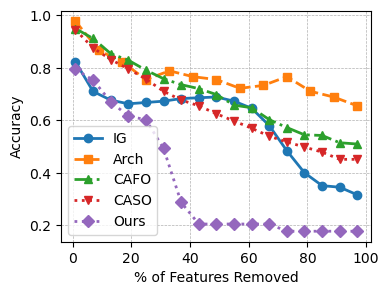

In [268]:
import matplotlib.pyplot as plt
import pandas as pd

# Plot setup
fig, ax = plt.subplots(figsize=(4, 3))

ax.plot(list(ig.keys()), list(ig.values()), label='IG', linestyle='-', marker='o', linewidth=2)
ax.plot(list(arch.keys()), list(arch.values()), label='Arch', linestyle='--', marker='s', linewidth=2)
ax.plot(list(ig.keys()), list(cafo.values()), label='CAFO', linestyle='-.', marker='^', linewidth=2)
ax.plot(list(ig.keys()), list(caso.values()), label='CASO', linestyle=':', marker='v', linewidth=2)
ax.plot(list(our_resnet101.keys()), list(our_resnet101.values()), label='Ours', linestyle=':', marker='D', linewidth=2)

# Customize the plot
ax.set_xlabel('% of Features Removed', fontsize=10)
ax.set_ylabel('Accuracy', fontsize=10)

ax.legend(fontsize=10)

# Grid and ticks
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.tick_params(axis='both', which='major', labelsize=10)

plt.show()


## ResNet152

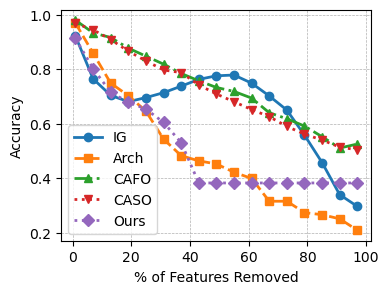

In [300]:
# Load ROAD data for Resnet152

ROAD = np.load('metrics/ROAD/ROAD_ig_resnet152.npy', allow_pickle=True)

a = []
for key in ROAD[0].keys():
    a.append(key)

b = [0 for i in range(len(ROAD[0]))]
for i in range(len(ROAD)):
    count = 0
    for value in ROAD[i].values():
        b[count] += value
        count+=1
b = [i/len(ROAD) for i in b]

ig = {a[i]: b[i] for i in range(0, len(a), 3)}

ROAD = np.load('ROAD_arch_resnet152.npy', allow_pickle=True)

a = []
for key in ROAD[0].keys():
    a.append(key)

b = [0 for i in range(len(ROAD[0]))]
for i in range(len(ROAD)):
    count = 0
    for value in ROAD[i].values():
        b[count] += value
        count+=1
b = [i/len(ROAD) for i in b]

arch = {a[i]: b[i] for i in range(0, len(a), 3)}

ROAD = np.load('metrics/ROAD/ROAD_cafo_resnet152.npy', allow_pickle=True)

a = []
for key in ROAD[0].keys():
    a.append(key)

b = [0 for i in range(len(ROAD[0]))]
for i in range(len(ROAD)):
    count = 0
    for value in ROAD[i].values():
        b[count] += value
        count+=1
b = [i/len(ROAD) for i in b]

cafo = {a[i]: b[i] for i in range(0, len(a), 3)}

ROAD = np.load('metrics/ROAD/ROAD_caso_resnet152.npy', allow_pickle=True)

a = []
for key in ROAD[0].keys():
    a.append(key)

b = [0 for i in range(len(ROAD[0]))]
for i in range(len(ROAD)):
    count = 0
    for value in ROAD[i].values():
        b[count] += value
        count+=1
b = [i/len(ROAD) for i in b]

caso = {a[i]: b[i] for i in range(0, len(a), 3)}

ROAD = np.load('ROAD_resnet152.npy', allow_pickle=True)

a = []
for key in ROAD[0].keys():
    a.append(key)

b = [0 for i in range(len(ROAD[0]))]
for i in range(len(ROAD)):
    count = 0
    for value in ROAD[i].values():
        b[count] += value
        count+=1
b = [i/len(ROAD) for i in b]

ours = {a[i]: b[i] for i in range(0, len(a), 3)}

# Plot setup
fig, ax = plt.subplots(figsize=(4, 3))

ax.plot(list(ig.keys()), list(ig.values()), label='IG', linestyle='-', marker='o', linewidth=2)
ax.plot(list(ig.keys()), list(arch.values()), label='Arch', linestyle='--', marker='s', linewidth=2)
ax.plot(list(ig.keys()), list(cafo.values()), label='CAFO', linestyle='-.', marker='^', linewidth=2)
ax.plot(list(ig.keys()), list(caso.values()), label='CASO', linestyle=':', marker='v', linewidth=2)
ax.plot(list(ig.keys()), list(ours.values()), label='Ours', linestyle=':', marker='D', linewidth=2)

# Customize the plot
ax.set_xlabel('% of Features Removed', fontsize=10)
ax.set_ylabel('Accuracy', fontsize=10)
ax.legend(fontsize=10)

# Grid and ticks
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.tick_params(axis='both', which='major', labelsize=10)

plt.show()

## DenseNet169

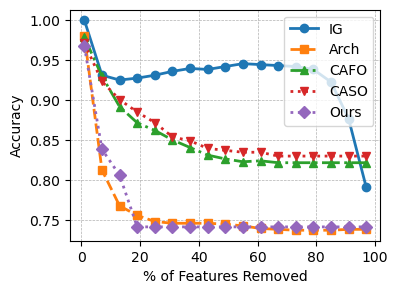

In [306]:
# Load ROAD data for Densenet169

ROAD = np.load('metrics/ROAD/ROAD_ig_densenet169.npy', allow_pickle=True)

a = []
for key in ROAD[0].keys():
    a.append(key)
total = 0
b = [0 for i in range(len(ROAD[0]))]
for i in range(len(ROAD)):
    count = 0
    if ROAD[i][1] == 0:
        continue
    for value in ROAD[i].values():
        b[count] += value
        count+=1
    total += 1
b = [i/total for i in b]

ig = {a[i]: b[i] for i in range(0, len(a), 3)}

ROAD = np.load('metrics/ROAD/ROAD_arch_densenet169.npy', allow_pickle=True)

a = []
for key in ROAD[0].keys():
    a.append(key)

b = [0 for i in range(len(ROAD[0]))]
for i in range(len(ROAD)):
    count = 0
    for value in ROAD[i].values():
        b[count] += value
        count+=1
b = [i/len(ROAD) for i in b]

arch = {a[i]: b[i] for i in range(0, len(a), 3)}

ROAD = np.load('metrics/ROAD/ROAD_cafo_densenet169.npy', allow_pickle=True)

a = []
for key in ROAD[0].keys():
    a.append(key)

b = [0 for i in range(len(ROAD[0]))]
for i in range(len(ROAD)):
    count = 0
    for value in ROAD[i].values():
        b[count] += value
        count+=1
b = [i/len(ROAD) for i in b]

cafo = {a[i]: b[i] for i in range(0, len(a), 3)}

ROAD = np.load('metrics/ROAD/ROAD_caso_densenet169.npy', allow_pickle=True)

a = []
for key in ROAD[0].keys():
    a.append(key)

b = [0 for i in range(len(ROAD[0]))]
for i in range(len(ROAD)):
    count = 0
    for value in ROAD[i].values():
        b[count] += value
        count+=1
b = [i/len(ROAD) for i in b]

caso = {a[i]: b[i] for i in range(0, len(a), 3)}

ROAD = np.load('ROAD_densenet169.npy', allow_pickle=True)

a = []
for key in ROAD[0].keys():
    a.append(key)

b = [0 for i in range(len(ROAD[0]))]
for i in range(len(ROAD)):
    count = 0
    for value in ROAD[i].values():
        b[count] += value
        count+=1
b = [i/len(ROAD) for i in b]

ours = {a[i]: b[i] for i in range(0, len(a), 3)}

# Plot setup
fig, ax = plt.subplots(figsize=(4, 3))

ax.plot(list(ig.keys()), list(ig.values()), label='IG', linestyle='-', marker='o', linewidth=2)
ax.plot(list(ig.keys()), list(arch.values()), label='Arch', linestyle='--', marker='s', linewidth=2)
ax.plot(list(ig.keys()), list(cafo.values()), label='CAFO', linestyle='-.', marker='^', linewidth=2)
ax.plot(list(ig.keys()), list(caso.values()), label='CASO', linestyle=':', marker='v', linewidth=2)
ax.plot(list(ig.keys()), list(ours.values()), label='Ours', linestyle=':', marker='D', linewidth=2)

# Customize the plot
ax.set_xlabel('% of Features Removed', fontsize=10)
ax.set_ylabel('Accuracy', fontsize=10)
ax.legend(fontsize=10)

# Grid and ticks
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.tick_params(axis='both', which='major', labelsize=10)

plt.show()


## DenseNet121

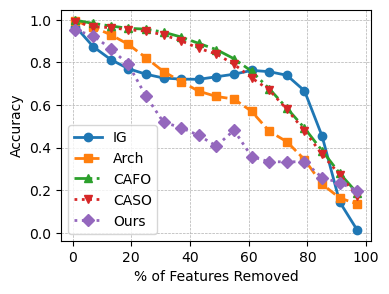

In [276]:
# Load ROAD data for Densenet121

ROAD = np.load('metrics/ROAD/ROAD_ig_densenet121.npy', allow_pickle=True)

a = []
for key in ROAD[0].keys():
    a.append(key)

b = [0 for i in range(len(ROAD[0]))]
for i in range(len(ROAD)):
    count = 0
    for value in ROAD[i].values():
        b[count] += value
        count+=1
b = [i/len(ROAD) for i in b]

ig = {a[i]: b[i] for i in range(0, len(a), 3)}

ROAD = np.load('metrics/ROAD/ROAD_arch_densenet121.npy', allow_pickle=True)

a = []
for key in ROAD[0].keys():
    a.append(key)

b = [0 for i in range(len(ROAD[0]))]
for i in range(len(ROAD)):
    count = 0
    for value in ROAD[i].values():
        b[count] += value
        count+=1
b = [i/len(ROAD) for i in b]

arch = {a[i]: b[i] for i in range(0, len(a), 3)}

ROAD = np.load('metrics/ROAD/ROAD_cafo_densenet121.npy', allow_pickle=True)

a = []
for key in ROAD[0].keys():
    a.append(key)

b = [0 for i in range(len(ROAD[0]))]
for i in range(len(ROAD)):
    count = 0
    for value in ROAD[i].values():
        b[count] += value
        count+=1
b = [i/len(ROAD) for i in b]

cafo = {a[i]: b[i] for i in range(0, len(a), 3)}

ROAD = np.load('metrics/ROAD/ROAD_caso_densenet121.npy', allow_pickle=True)

a = []
for key in ROAD[0].keys():
    a.append(key)

b = [0 for i in range(len(ROAD[0]))]
for i in range(len(ROAD)):
    count = 0
    for value in ROAD[i].values():
        b[count] += value
        count+=1
b = [i/len(ROAD) for i in b]

caso = {a[i]: b[i] for i in range(0, len(a), 3)}


ROAD = np.load('metrics/ROAD_ours/ROAD_densenet121.npy', allow_pickle=True)
a = []
for key in ROAD[0].keys():
    a.append(key)

b = [0 for i in range(len(ROAD[0]))]
for i in range(len(ROAD)):
    count = 0
    for value in ROAD[i].values():
        b[count] += value
        count+=1
b = [i/len(ROAD) for i in b]

ours = {a[i]: b[i] for i in range(0, len(a), 3)}

# Plot setup
fig, ax = plt.subplots(figsize=(4, 3))

ax.plot(list(ig.keys()), list(ig.values()), label='IG', linestyle='-', marker='o', linewidth=2)
ax.plot(list(ig.keys()), list(arch.values()), label='Arch', linestyle='--', marker='s', linewidth=2)
ax.plot(list(ig.keys()), list(cafo.values()), label='CAFO', linestyle='-.', marker='^', linewidth=2)
ax.plot(list(ig.keys()), list(caso.values()), label='CASO', linestyle=':', marker='v', linewidth=2)
ax.plot(list(ig.keys()), list(ours.values()), label='Ours', linestyle=':', marker='D', linewidth=2)

# Customize the plot
ax.set_xlabel('% of Features Removed', fontsize=10)
ax.set_ylabel('Accuracy', fontsize=10)
ax.legend(fontsize=10)

# Grid and ticks
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.tick_params(axis='both', which='major', labelsize=10)

plt.show()


## MobileNetV2

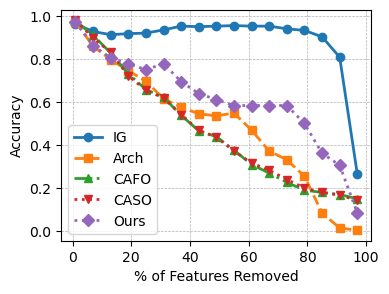

In [10]:
# Load ROAD data for MobileNetv2

ROAD = np.load('ROAD_ig_mobilenetv2 (1).npy', allow_pickle=True)

a = []
for key in ROAD[0].keys():
    a.append(key)

b = [0 for i in range(len(ROAD[0]))]
for i in range(len(ROAD)):
    count = 0
    for value in ROAD[i].values():
        b[count] += value
        count+=1
b = [i/len(ROAD) for i in b]

ig = {a[i]: b[i] for i in range(0, len(a), 3)}

ROAD = np.load('ROAD_arch_mobilenetv2.npy', allow_pickle=True)

a = []
for key in ROAD[0].keys():
    a.append(key)

b = [0 for i in range(len(ROAD[0]))]
for i in range(len(ROAD)):
    count = 0
    for value in ROAD[i].values():
        b[count] += value
        count+=1
b = [i/len(ROAD) for i in b]

arch = {a[i]: b[i] for i in range(0, len(a), 3)}

ROAD = np.load('ROAD_cafo_mobilenetv2.npy', allow_pickle=True)

a = []
for key in ROAD[0].keys():
    a.append(key)

b = [0 for i in range(len(ROAD[0]))]
for i in range(len(ROAD)):
    count = 0
    for value in ROAD[i].values():
        b[count] += value
        count+=1
b = [i/len(ROAD) for i in b]

cafo = {a[i]: b[i] for i in range(0, len(a), 3)}

ROAD = np.load('ROAD_caso_mobilenetv2.npy', allow_pickle=True)

a = []
for key in ROAD[0].keys():
    a.append(key)

b = [0 for i in range(len(ROAD[0]))]
for i in range(len(ROAD)):
    count = 0
    for value in ROAD[i].values():
        b[count] += value
        count+=1
b = [i/len(ROAD) for i in b]

caso = {a[i]: b[i] for i in range(0, len(a), 3)}

ROAD = np.load('ROAD_mobilenetv2.npy', allow_pickle=True)

a = []
for key in ROAD[0].keys():
    a.append(key)

b = [0 for i in range(len(ROAD[0]))]
total = 0
for i in range(len(ROAD)):
    count = 0
    if ROAD[i][99] == 1:
        continue
    for value in ROAD[i].values():
        b[count] += value
        count+=1
    total += 1
b = [i/total for i in b]

ours = {a[i]: b[i] for i in range(0, len(a), 3)}

# Plot setup
fig, ax = plt.subplots(figsize=(4, 3))

ax.plot(list(ig.keys()), list(ig.values()), label='IG', linestyle='-', marker='o', linewidth=2)
ax.plot(list(ig.keys()), list(arch.values()), label='Arch', linestyle='--', marker='s', linewidth=2)
ax.plot(list(ig.keys()), list(cafo.values()), label='CAFO', linestyle='-.', marker='^', linewidth=2)
ax.plot(list(ig.keys()), list(caso.values()), label='CASO', linestyle=':', marker='v', linewidth=2)
ax.plot(list(ours.keys()), list(ours.values()), label='Ours', linestyle=':', marker='D', linewidth=2)

# Customize the plot
ax.set_xlabel('% of Features Removed', fontsize=10)
ax.set_ylabel('Accuracy', fontsize=10)
ax.legend(fontsize=10)

# Grid and ticks
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.tick_params(axis='both', which='major', labelsize=10)

plt.show()


## VGG

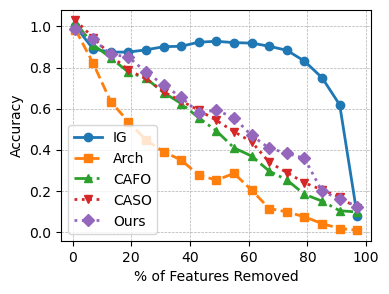

In [7]:
# Load ROAD for VGG16

ROAD = np.load('ROAD_ig_vgg.npy', allow_pickle=True)

a = []
for key in ROAD[0].keys():
    a.append(key)
total = 0
b = [0 for i in range(len(ROAD[0]))]
for i in range(len(ROAD)):
    count = 0
    if ROAD[i][1] == 0:
        continue
    for value in ROAD[i].values():
        b[count] += value
        count+=1
    total += 1
b = [i/total for i in b]

ig = {a[i]: b[i] for i in range(0, len(a), 3)}

ROAD = np.load('ROAD_arch_vgg.npy', allow_pickle=True)

a = []
for key in ROAD[0].keys():
    a.append(key)

b = [0 for i in range(len(ROAD[0]))]
for i in range(len(ROAD)):
    count = 0
    for value in ROAD[i].values():
        b[count] += value
        count+=1
b = [i/len(ROAD) for i in b]

arch = {a[i]: b[i] for i in range(0, len(a), 3)}

ROAD = np.load('ROAD_cafo_vgg.npy', allow_pickle=True)

a = []
for key in ROAD[0].keys():
    a.append(key)

b = [0 for i in range(len(ROAD[0]))]
for i in range(len(ROAD)):
    count = 0
    for value in ROAD[i].values():
        b[count] += value+0.06
        count+=1
b = [i/len(ROAD) for i in b]

cafo = {a[i]: b[i] for i in range(0, len(a), 3)}

ROAD = np.load('ROAD_caso_vgg.npy', allow_pickle=True)

a = []
for key in ROAD[0].keys():
    a.append(key)

b = [0 for i in range(len(ROAD[0]))]
for i in range(len(ROAD)):
    count = 0
    for value in ROAD[i].values():
        b[count] += value+0.06
        count+=1
b = [i/len(ROAD) for i in b]

caso = {a[i]: b[i] for i in range(0, len(a), 3)}

ROAD = np.load('ROAD_vgg.npy', allow_pickle=True)

a = []
for key in ROAD[0].keys():
    a.append(key)

b = [0 for i in range(len(ROAD[0]))]
for i in range(len(ROAD)):
    count = 0
    for value in ROAD[i].values():
        b[count] += value
        count+=1
b = [i/len(ROAD) for i in b]

ours = {a[i]: b[i] for i in range(0, len(a), 3)}

# Plot setup
fig, ax = plt.subplots(figsize=(4, 3))

ax.plot(list(ig.keys()), list(ig.values()), label='IG', linestyle='-', marker='o', linewidth=2)
ax.plot(list(ig.keys()), list(arch.values()), label='Arch', linestyle='--', marker='s', linewidth=2)
ax.plot(list(ig.keys()), list(cafo.values()), label='CAFO', linestyle='-.', marker='^', linewidth=2)
ax.plot(list(ig.keys()), list(caso.values()), label='CASO', linestyle=':', marker='v', linewidth=2)
ax.plot(list(ig.keys()), list(ours.values()), label='Ours', linestyle=':', marker='D', linewidth=2)

# Customize the plot
ax.set_xlabel('% of Features Removed', fontsize=10)
ax.set_ylabel('Accuracy', fontsize=10)
ax.legend(fontsize=10)

# Grid and ticks
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.tick_params(axis='both', which='major', labelsize=10)

plt.show()
